[[ 5.27543759]
 [ 9.94490169]
 [13.57846417]
 [15.9900308 ]
 [17.17333694]
 [17.17333694]
 [15.9900308 ]
 [13.57846417]
 [ 9.94490169]
 [ 5.27543759]]


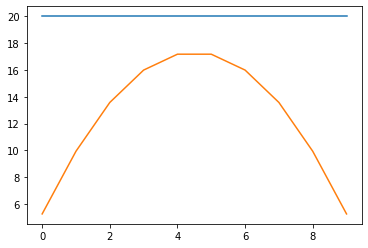

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
k=385                            #Conductivity
density=8960                        #Density
cp=390.0                              #Specific Heat
alpha=k/density/cp                #Alfa Value Calculated
deltax=0.05                        #Cell Volume Calculated
deltat=0.003                    #Time Increment
beta=alpha*deltat/(deltax**2)     #Beta value Calculated 
nodes=10                          #Number of Nodes we want
Time=100                            #Total End time
def EquationSolver(q,w):          #Function for solving the equations
    Nextstep=np.dot(inv(q),w)
    return Nextstep
q=np.zeros((nodes,nodes))         #The Main matrix Initialized
w=np.zeros((nodes,1))             #Co-Efficient matrix Initiallized
for i in range(nodes):            #For Loop for Value Initialization
    if i==0:                      #for the Left node
        q[i][i]=(1+(2*beta))
        q[i][i+1]=-1*beta
    if i==nodes-1:               #for right node
        q[i][i]=(1+(2*beta))
        q[i][i-1]=-1*beta
    if i>0 and i<nodes-1:        #for central nodes
        q[i][i]=(1+(2*beta))
        q[i][i-1]=-1*beta
        q[i][i+1]=-1*beta             
for i in range(nodes):           #Temperature Profile Initialization
    w[i][0]=20
time=0   #The starting time
plt.plot(w)
while(time<Time):                #Step Solution Finding
    time+=deltat                 #Increment
    w=EquationSolver(q,w)        #Function call EquationSolver
    #plt.plot(w)                  #Plotting solution at each step
plt.plot(w)                      #Ploting the Final Solution
#print(w)                         #Printing the Final Solution
#plt.show()                     
#Sol1                             #Deltat1
#Sol2                             #Delta0.1
#Sol3                             #Delta0.01
#Sol4                             #Delta0.001
#Sol5                             #Delta0.0001
Sol6=w                           #Delta0.00001
#print("Delta 1 \n",Sol1)
#print("Delta 0.1 \n",Sol2)
#print("Delta 0.01 \n",Sol3)
#print("Delta 0.001 \n",Sol4)
#print("Delta 0.0001 \n",Sol5)
#print("Delta 0.00001 \n",Sol6)
print(w)
#The observation is that as the Increment in the time is reduced 
#and the number of iterations is increased the accuracy of the solution
#is increasing, and the variation in the results is reducing
#if the Delta Time is increased solution is having a lot of variation.